In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
df_movies=pd.read_csv(r"P:\CarrerFoundy\Data Immersion (deep learning)\Exercise 6\Execrise 6.1\Clean Data Set\Movies.csv")

# Correlation matrix heatmap(colored)

In [7]:
# Select relevant columns for correlation (e.g., budget, rating, gross revenue, etc.)
df_selected = df_movies[['Budget', 'Duration (min)', 'Year', 'Gross Revenue']]

In [9]:
# Compute the correlation matrix
corr_matrix = df_selected.corr()

In [11]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

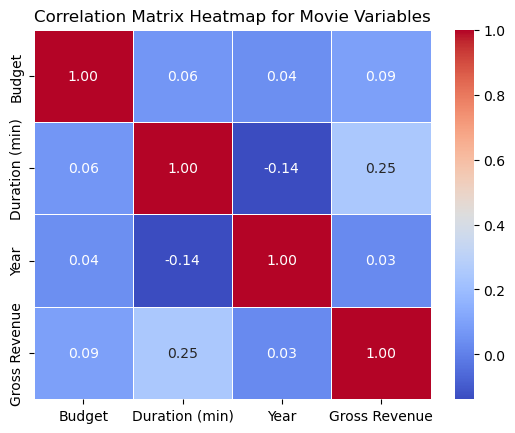

In [13]:
# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar=True)

# Set the title of the plot
plt.title('Correlation Matrix Heatmap for Movie Variables')

# Show the plot
plt.show()

### There are four variables in the correlation Matrix heat map for the movie variables.  In this heatmap, gross revenue has a relation with budget:1.0 coefficient indicating a strong positive correlation, which makes sense, the more convenient the budget for the movie, the higher the gross revenue.

#  A scatterplot (or plots) for the variables with the strongest correlations

In [53]:
# Select relevant columns for correlation (e.g., budget, gross revenue, etc.)
df_selected = df_movies[['Budget', 'Gross Revenue', 'Duration (min)', 'Year']]

In [55]:
# Compute the correlation matrix
corr_matrix = df_selected.corr()

Top 5 strongest correlations:
 Gross Revenue   Duration (min)    0.245847
Duration (min)  Gross Revenue     0.245847
                Year             -0.138107
Year            Duration (min)   -0.138107
Budget          Gross Revenue     0.093306
dtype: float64


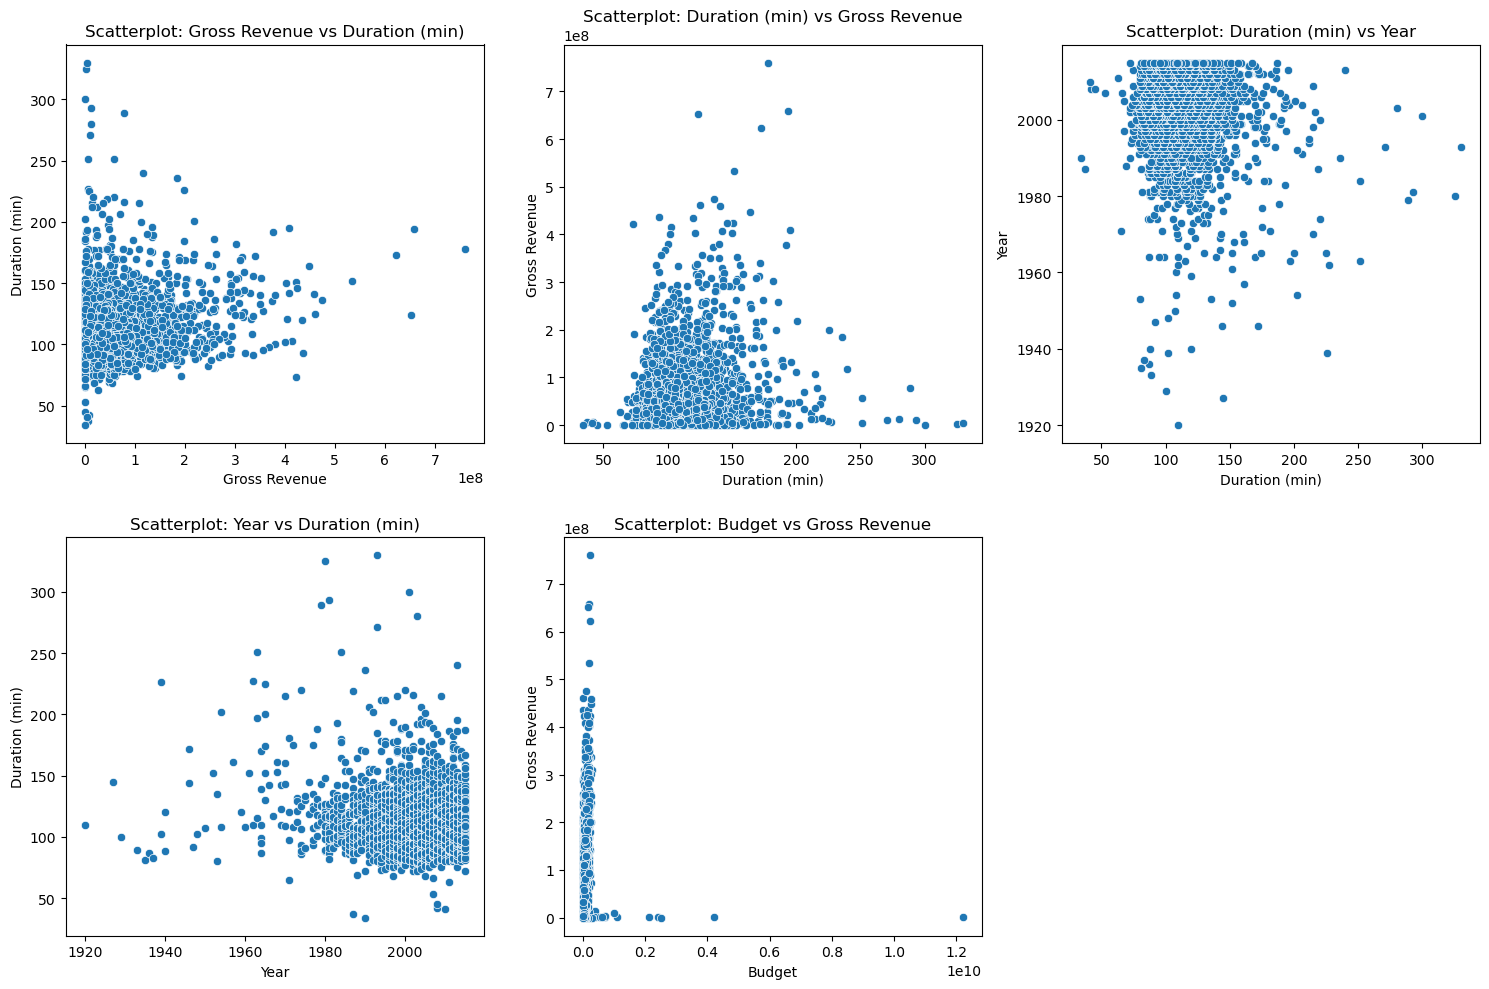

In [57]:
# Identify the strongest correlations (absolute values)
strongest_corr = corr_matrix.unstack().sort_values(ascending=False, key=abs)
strongest_corr = strongest_corr[strongest_corr != 1]  # Remove self-correlation

# Get the top pairs with the highest correlation
top_pairs = strongest_corr.head(5)  # Top 5 pairs with strongest correlation

# Print the top pairs
print("Top 5 strongest correlations:\n", top_pairs)

# Create scatter plots for these pairs
plt.figure(figsize=(15, 10))

for i, (var1, var2) in enumerate(top_pairs.index):
    plt.subplot(2, 3, i + 1)  # Arrange in a grid (2 rows, 3 columns)
    sns.scatterplot(data=df_selected, x=var1, y=var2)
    plt.title(f"Scatterplot: {var1} vs {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### The above five scattered plots show Revenue vs. Duration (min), Duration (min) vs. Gross Revenue, Duration vs. Year and vice versa, and Budget vs. Gross Revenue. Every scattered plot except Budget, from 1920 to 2000, the highest amount of gross revenue and time [ Duration(min) and year started more than 50 to 200. In the case of scattered Budget vs Gross Revenue from 0 to 5 out of 7. On the other hand, the Budget is only 0.0-0.2. 

# A pair plot of the entire data set

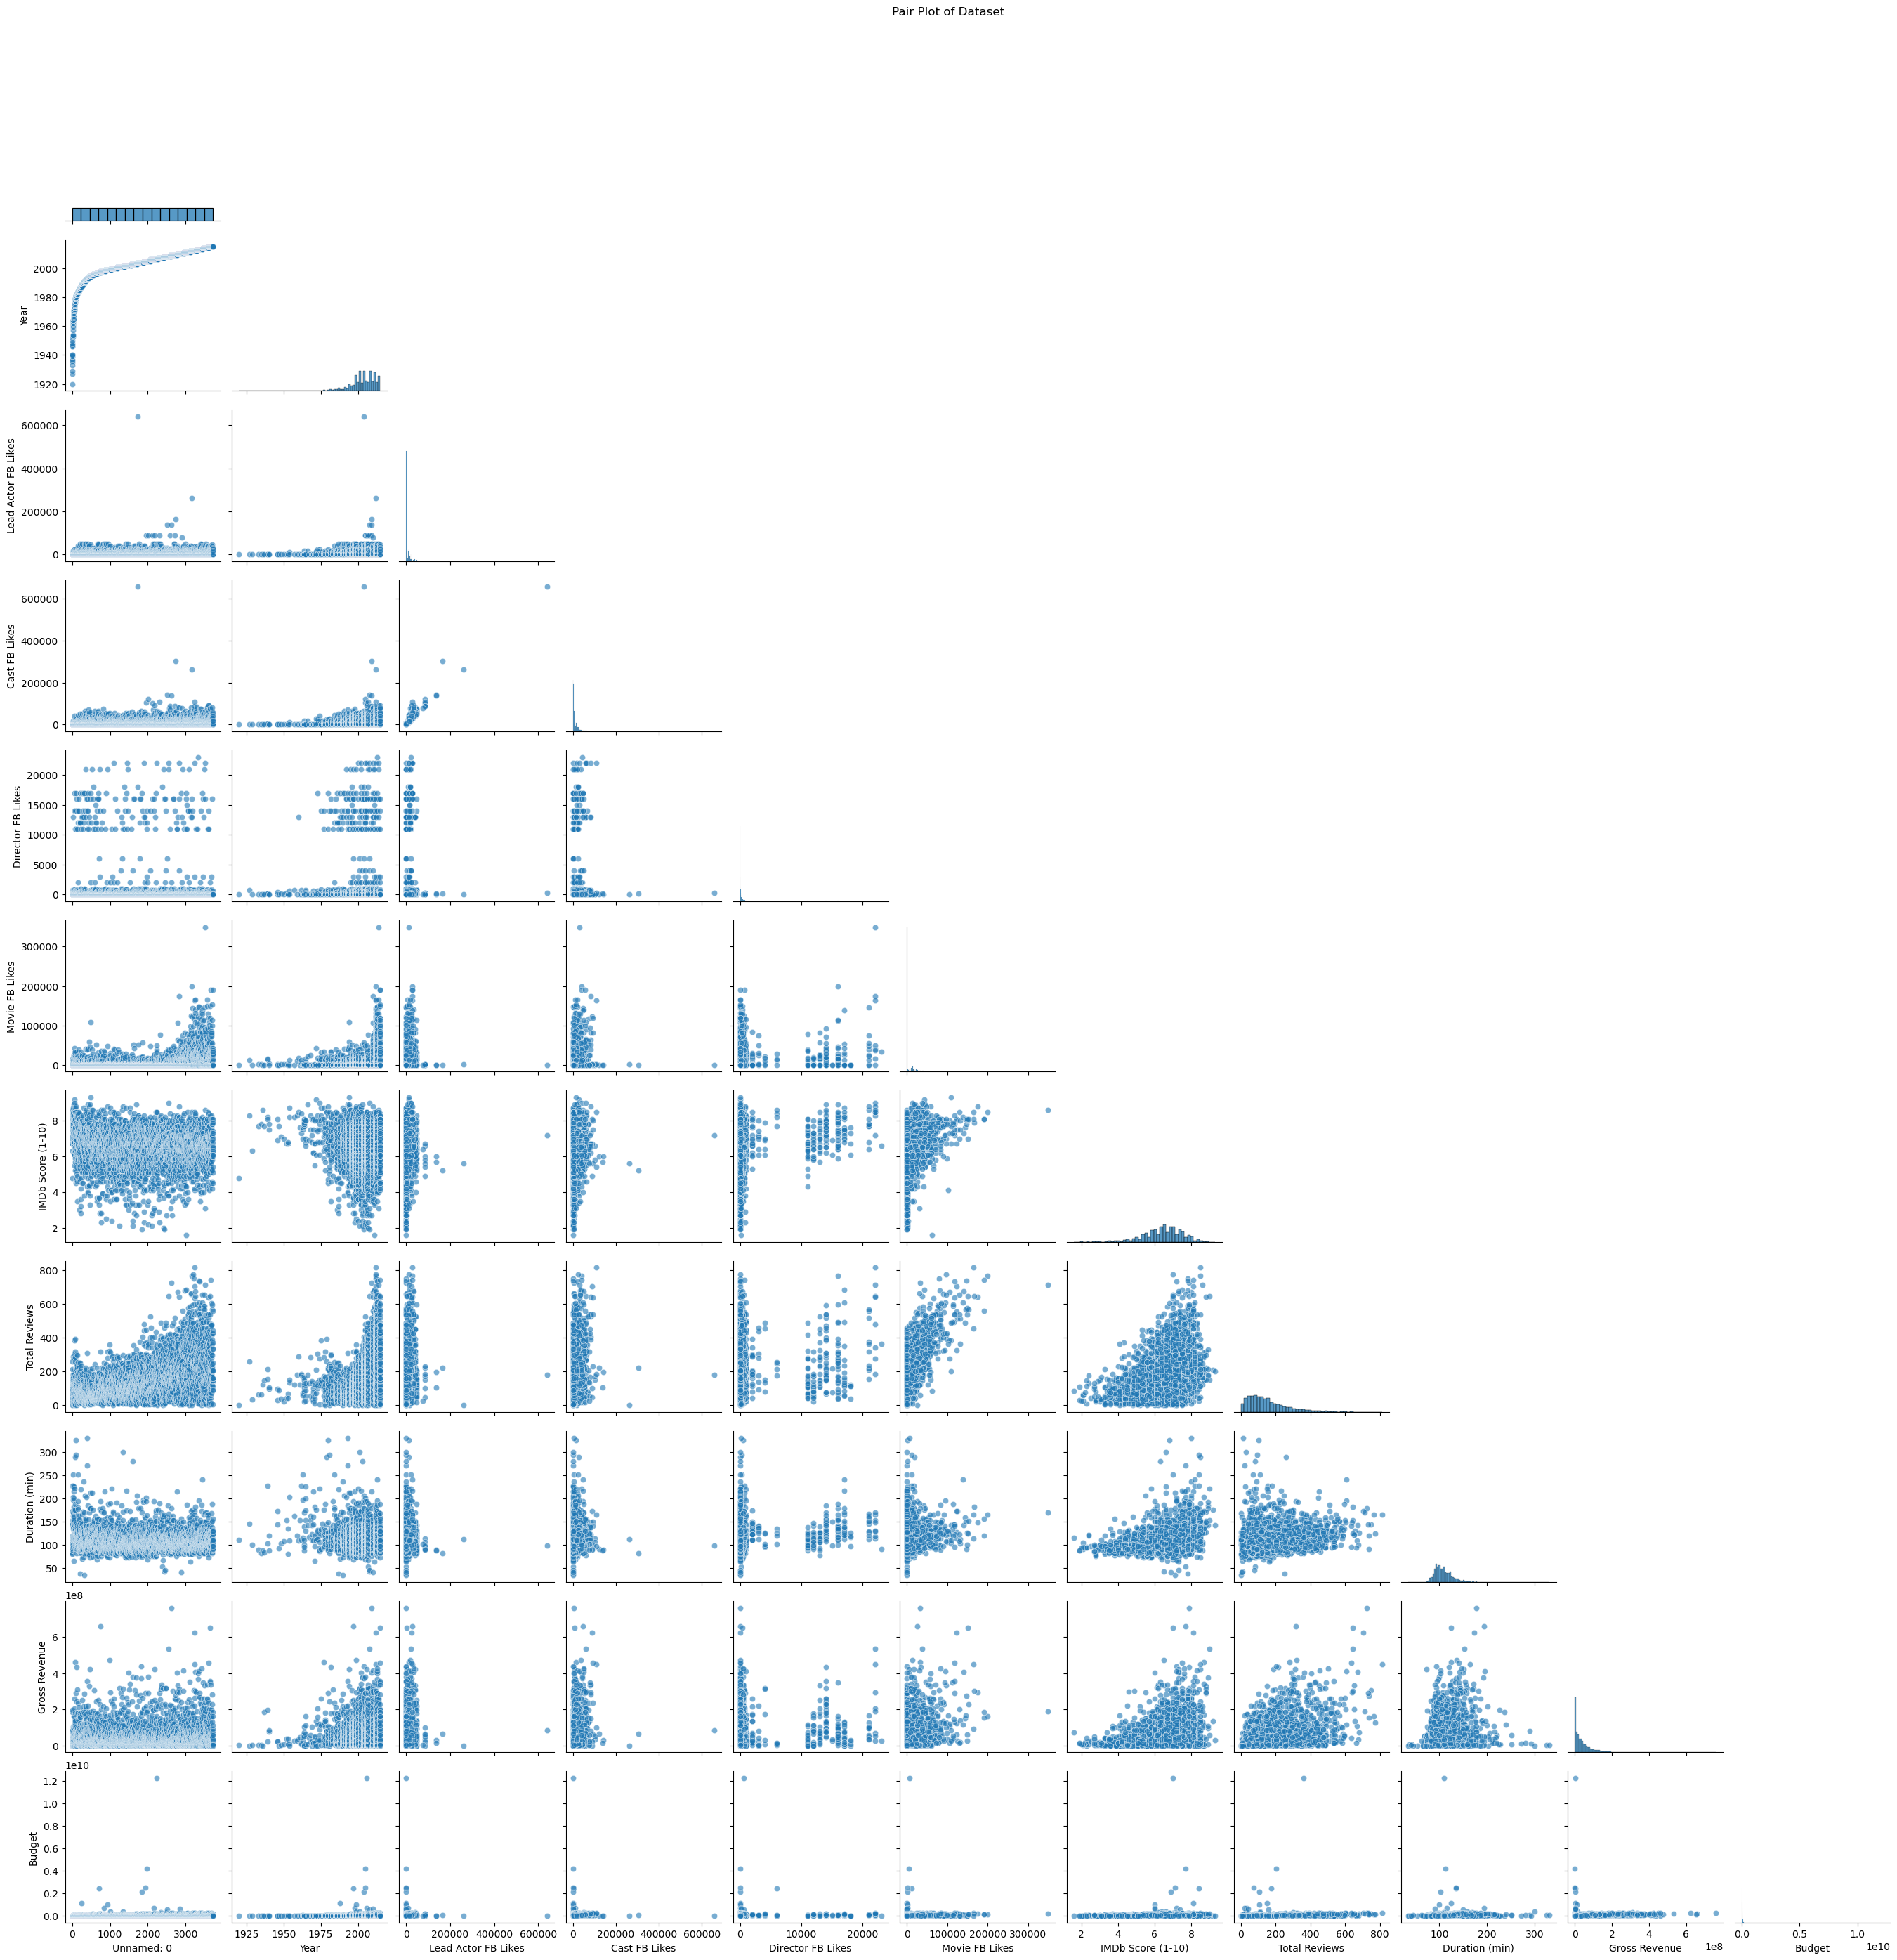

In [63]:
# Optionally, select only numerical columns for the pair plot
df_numerical = df_movies.select_dtypes(include=['float64', 'int64'])


# Create the pair plot
sns.pairplot(df_numerical, diag_kind='hist', corner=True, plot_kws={'alpha': 0.6})

# Set a title for the plot
plt.suptitle('Pair Plot of Dataset', y=1.02)  # Adjust y to position the title

# Show the plot
plt.show()

### To comment on the distribution of variables, it is important to first review the descriptive statistics (e.g., mean, median, range) and visualizations (e.g., histograms, boxplots) for each variable in the above dataset.

# A categorical plot and interpret the results

In [76]:
# Inspect unique values in a categorical column (e.g., 'genre')
print("Unique Genres:", df_movies['Genre'].unique())

Unique Genres: ['Crime' 'Drama' 'Musical' 'Comedy' 'Animation' 'Adventure' 'Biography'
 'Action' 'Horror' 'Western' 'Documentary' 'Mystery' 'Fantasy' 'Sci-Fi'
 'Family' 'Thriller' 'Romance']


In [84]:
# Inspect the dataset structure
print(df_movies.head())
print(df_movies.columns)

   Unnamed: 0                           Title Release Date  Year  \
0           0  Over the Hill to the Poorhouse    9/15/1920  1920   
1           1                      Metropolis    1/26/1927  1927   
2           2             The Broadway Melody   11/11/1929  1929   
3           3                     42nd Street    8/29/1933  1933   
4           4                         Top Hat    4/15/1935  1935   

         Color/B&W    Genre Language  Country       Geo Area     Rating  ...  \
0  Black and White    Crime  English      USA  North America  Not Rated  ...   
1  Black and White    Drama   German  Germany         Europe  Not Rated  ...   
2  Black and White  Musical  English      USA  North America     Passed  ...   
3  Black and White   Comedy  English      USA  North America  Not Rated  ...   
4  Black and White   Comedy  English      USA  North America   Approved  ...   

       Director Name Lead Actor FB Likes  Cast FB Likes  Director FB Likes  \
0  Harry F. Millarde            

C:\Users\sojan\AppData\Local\Temp\ipykernel_24288\1895291524.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_movies, x='Genre', y='Gross Revenue', ci=None, palette='viridis')
C:\Users\sojan\AppData\Local\Temp\ipykernel_24288\1895291524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_movies, x='Genre', y='Gross Revenue', ci=None, palette='viridis')


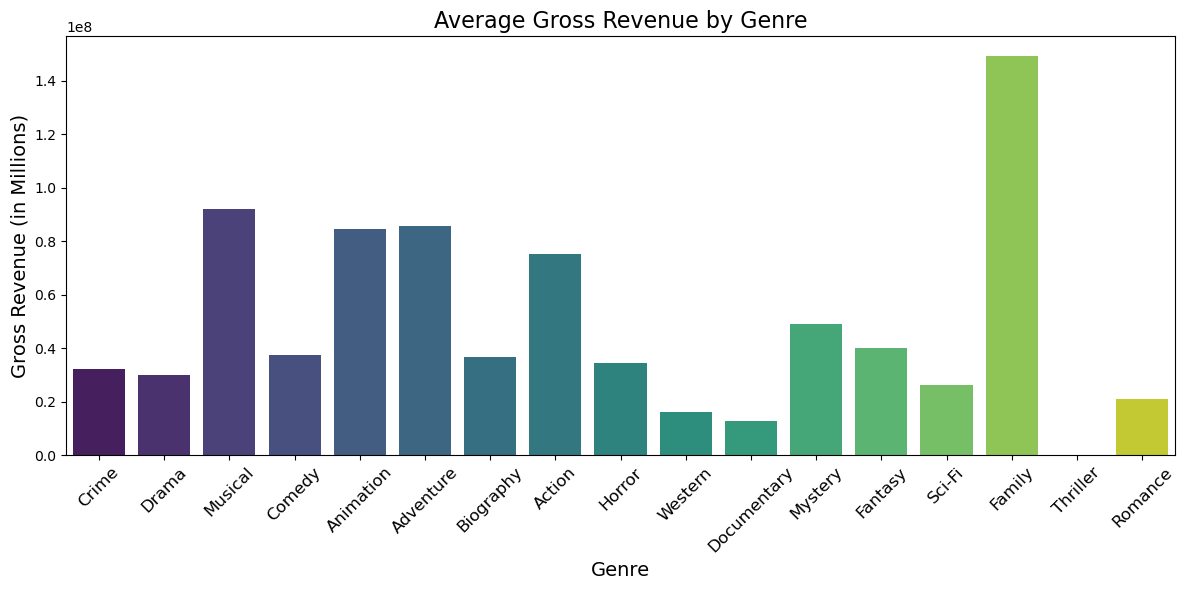

In [98]:
# Create a categorical plot (bar plot of gross revenue by genre)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_movies, x='Genre', y='Gross Revenue', ci=None, palette='viridis')

# Customize the plot
plt.title('Average Gross Revenue by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Gross Revenue (in Millions)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

### The highest Gross revenue generated by the Family category (Genre) is about 1.4 million. The average gross revenue in the categories of Musical, Animation, Adventure, and Action are almost 90 to 100 million. The thriller category is the lowest revenue-generating category which generated only thousands. Other Categories like Crime, Drama, Horror, Western, Mystery, Fantasy, and Sci-Fi are below average these generate revenue of about 0.3 to 0.5 million.    